# Comparing Distributions

In [1]:
import collections
import pandas as pd
import networkx as nx
import itertools
import numpy as np

In [2]:
assert nx.__version__, '2.0'

In [3]:
from scipy import stats

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as lines

%matplotlib inline

In [5]:
font = {'weight': 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

In [8]:
G = nx.read_gml('../data/pd_graph.gml')
Z = nx.read_gml('../data/anarchy_graph.gml')
H = nx.read_gml('../data/auction_graph.gml')

In [9]:
def test_normality(distribution):
    alpha = 0.05
    z, p = stats.mstats.normaltest(distribution)

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected. It is not normally distributed.")
    else:
        print("The null hypothesis cannot be rejected. It is normally distributed.")

In [10]:
def test_kruskal(distributions):
    alpha = 0.05
    _, p = stats.kruskal(distributions[0],distributions[1], distributions[2])
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(p, "The null hypothesis can be rejected.")
    else:
        print(p, "The null hypothesis cannot be rejected.")

In [11]:
def test_mannwhitneyu(distributions, alternative):
    alpha = 0.05
    _, p = stats.mannwhitneyu(distributions[0],distributions[1], alternative=alternative)
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(p, "The null hypothesis can be rejected.")
    else:
        print(p, "The null hypothesis cannot be rejected.")

Degree distributions
---------------------

In [12]:
pd_distribution = sorted([d for n, d in G.degree()], reverse=True)
anarchy_distribution = sorted([d for n, d in Z.degree()], reverse=True)
auction_distribution = sorted([d for n, d in H.degree()], reverse=True)

/home/nightwing/anaconda3/envs/literature/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


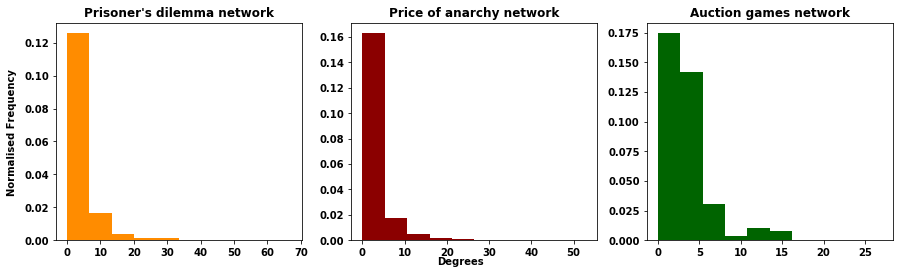

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].hist(pd_distribution,  color='darkorange', normed=True);
axes[0].set_title("Prisoner's dilemma network", fontweight='bold')

axes[1].hist(anarchy_distribution,  color='darkred', normed=True);
axes[1].set_title("Price of anarchy network", fontweight='bold')

axes[2].hist(auction_distribution, color='darkgreen', normed=True);
axes[2].set_title("Auction games network", fontweight='bold')

fig.text(0.5, 0.04, 'Degrees', ha='center')
fig.text(0.08, 0.5, 'Normalised Frequency', va='center', rotation='vertical');

#plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/degrees_histrograms.pdf', format='pdf', bbox_inches='tight')

In [18]:
test_normality(pd_distribution)

The null hypothesis can be rejected. It is not normally distributed.


In [19]:
test_normality(auction_distribution)

The null hypothesis can be rejected. It is not normally distributed.


In [20]:
test_normality(anarchy_distribution)

The null hypothesis can be rejected. It is not normally distributed.


In [21]:
test_kruskal([pd_distribution, anarchy_distribution, auction_distribution])

2.9989635626923616e-25 The null hypothesis can be rejected.


Betweenness centrality comparison
---------------------------------

In [7]:
import seaborn as sns

In [8]:
with open('pd_bc_dist.tex', 'r') as textfile:
    pd_bc = textfile.read()

In [9]:
with open('pa_bc_dist.tex', 'r') as textfile:
    pa_bc = textfile.read()

In [10]:
with open('ag_bc_dist.tex', 'r') as textfile:
    ag_bc = textfile.read()

In [11]:
pd_bc = [float(i) for i in pd_bc.replace('[', '').replace(']', '').split(',')]
pa_bc = [float(i) for i in pa_bc.replace('[', '').replace(']', '').split(',')]
ag_bc = [float(i) for i in ag_bc.replace('[', '').replace(']', '').split(',')]

In [12]:
np.median(ag_bc)

0.0

In [115]:
pal = ['darkorange', 'darked', 'darkgreen']

In [51]:
def set_axis_style(ax, labels):
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

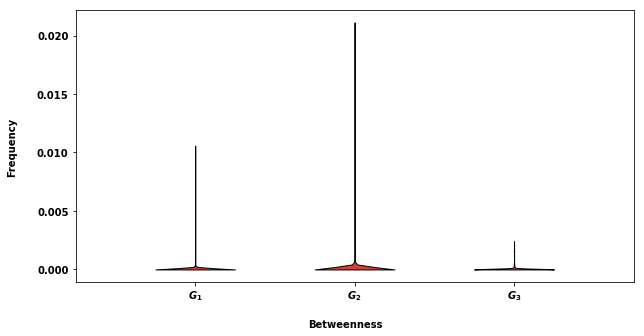

In [56]:
fig, axes = plt.subplots(figsize=(10, 5))
parts = plt.violinplot([pd_bc, ag_bc, pa_bc], widths=0.5, showmedians=False, showextrema=False);

fig.text(0.5, 0, 'Betweenness', ha='center')
fig.text(0.03, 0.5, 'Frequency', va='center', rotation='vertical');

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    
labels = ['$G_1$', '$G_2$', '$G_3$']
#for ax in axes:
set_axis_style(axes, labels)

plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/Betweenness_histrograms.pdf', format='pdf', bbox_inches='tight')

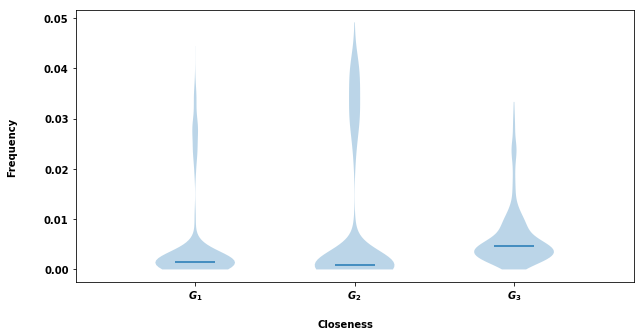

In [57]:
fig, axes = plt.subplots(figsize=(10, 5))
parts = plt.violinplot([pd_cc, ag_cc, pa_cc], widths=0.5, showmedians=True, showextrema=False);

fig.text(0.5, 0, 'Closeness', ha='center')
fig.text(0.03, 0.5, 'Frequency', va='center', rotation='vertical');

# for pc in parts['bodies']:
#     pc.set_facecolor('#D43F3A')
#     pc.set_edgecolor('black')
#     pc.set_alpha(1)
labels = ['$G_1$', '$G_2$', '$G_3$']
#for ax in axes:
set_axis_style(axes, labels)

plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/Closeness_histrograms.pdf', format='pdf', bbox_inches='tight')

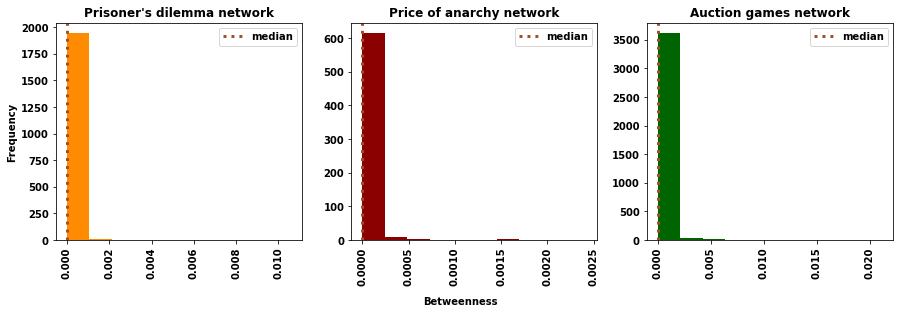

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].hist(pd_bc,  color='darkorange'); 
axes[0].set_title("Prisoner's dilemma network", fontweight='bold')

axes[1].hist(pa_bc,  color='darkred');
axes[1].set_title("Price of anarchy network", fontweight='bold')

axes[2].hist(ag_bc, color='darkgreen');
axes[2].set_title("Auction games network", fontweight='bold')

fig.text(0.5, -0.1, 'Betweenness', ha='center')
fig.text(0.08, 0.5, 'Frequency', va='center', rotation='vertical');

axes[0].axvline(np.median(pd_bc), color='sienna', linestyle=':', linewidth=3, label='median')
axes[1].axvline(np.median(pa_bc), color='sienna', linestyle=':', linewidth=3, label='median')
axes[2].axvline(np.median(ag_bc), color='sienna', linestyle=':', linewidth=3, label='median')

for i in range(3):
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=90)
    axes[i].legend()
    
plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/Betweenness_histrograms.pdf', format='pdf', bbox_inches='tight')

In [69]:
test_kruskal([pd_bc, pa_bc, ag_bc])

1.2759882833e-07 The null hypothesis can be rejected.


In [22]:
test_mannwhitneyu([pd_bc, pa_bc], 'less')

0.0439269349349 The null hypothesis can be rejected.


In [23]:
test_mannwhitneyu([pd_bc, ag_bc], 'less')

1.3701599679e-08 The null hypothesis can be rejected.


Closeness centrality comparison
---------------------------------

In [22]:
with open('pd_cc_dist.tex', 'r') as textfile:
    pd_cc = textfile.read()

In [23]:
with open('pa_cc_dist.tex', 'r') as textfile:
    pa_cc = textfile.read()

In [24]:
with open('ag_cc_dist.tex', 'r') as textfile:
    ag_cc = textfile.read()

In [25]:
pd_cc = [float(i) for i in pd_cc.replace('[', '').replace(']', '').split(',')]
pa_cc = [float(i) for i in pa_cc.replace('[', '').replace(']', '').split(',')]
ag_cc = [float(i) for i in ag_cc.replace('[', '').replace(']', '').split(',')]

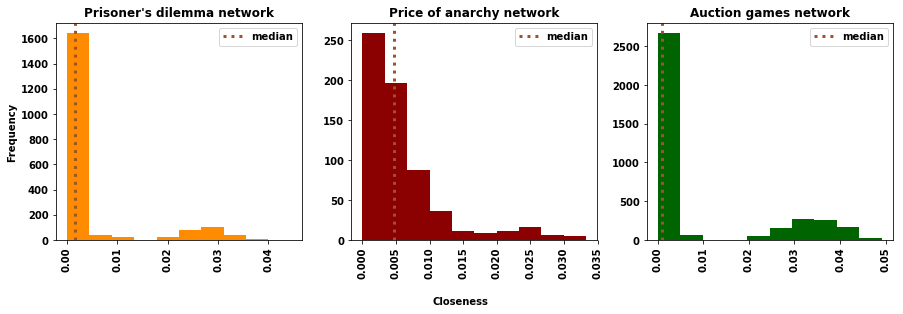

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].hist(pd_cc,  color='darkorange');
axes[0].axvline(np.median(pd_cc), color='sienna', linestyle=':', linewidth=3, label='median')
axes[0].set_title("Prisoner's dilemma network", fontweight='bold')

axes[1].hist(pa_cc,  color='darkred');
axes[1].axvline(np.median(pa_cc), color='sienna', linestyle=':', linewidth=3, label='median')
axes[1].set_title("Price of anarchy network", fontweight='bold')

axes[2].hist(ag_cc, color='darkgreen');
axes[2].axvline(np.median(ag_cc), color='sienna', linestyle=':', linewidth=3, label='median')
axes[2].set_title("Auction games network", fontweight='bold')

fig.text(0.5, -0.1, 'Closeness', ha='center')
fig.text(0.08, 0.5, 'Frequency', va='center', rotation='vertical');

for i in range(3):
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=90)
    axes[i].legend()


plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/Closeness_histrograms.pdf', format='pdf', bbox_inches='tight')

In [31]:
test_kruskal([pd_cc, pa_cc, ag_cc])

7.30418703556e-87 The null hypothesis can be rejected.


In [45]:
round(7.30418703556e-87, 10)

0.0

In [29]:
test_mannwhitneyu([pd_bc, pa_cc], 'less')

0.0 The null hypothesis can be rejected.


In [30]:
test_mannwhitneyu([pd_cc, ag_cc], 'greater')

4.10048718811e-08 The null hypothesis can be rejected.
